In [2]:
import py_compile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from dotenv import load_dotenv

from mymodule import myfunc as mf
load_dotenv()
imgout = os.environ["imgout"]
root_dir = os.environ["root_dir"]
snaps_dir = os.environ["snaps_dir"]


<Figure size 432x288 with 0 Axes>

<Figure size 1728x1008 with 0 Axes>

<Figure size 1728x1008 with 0 Axes>

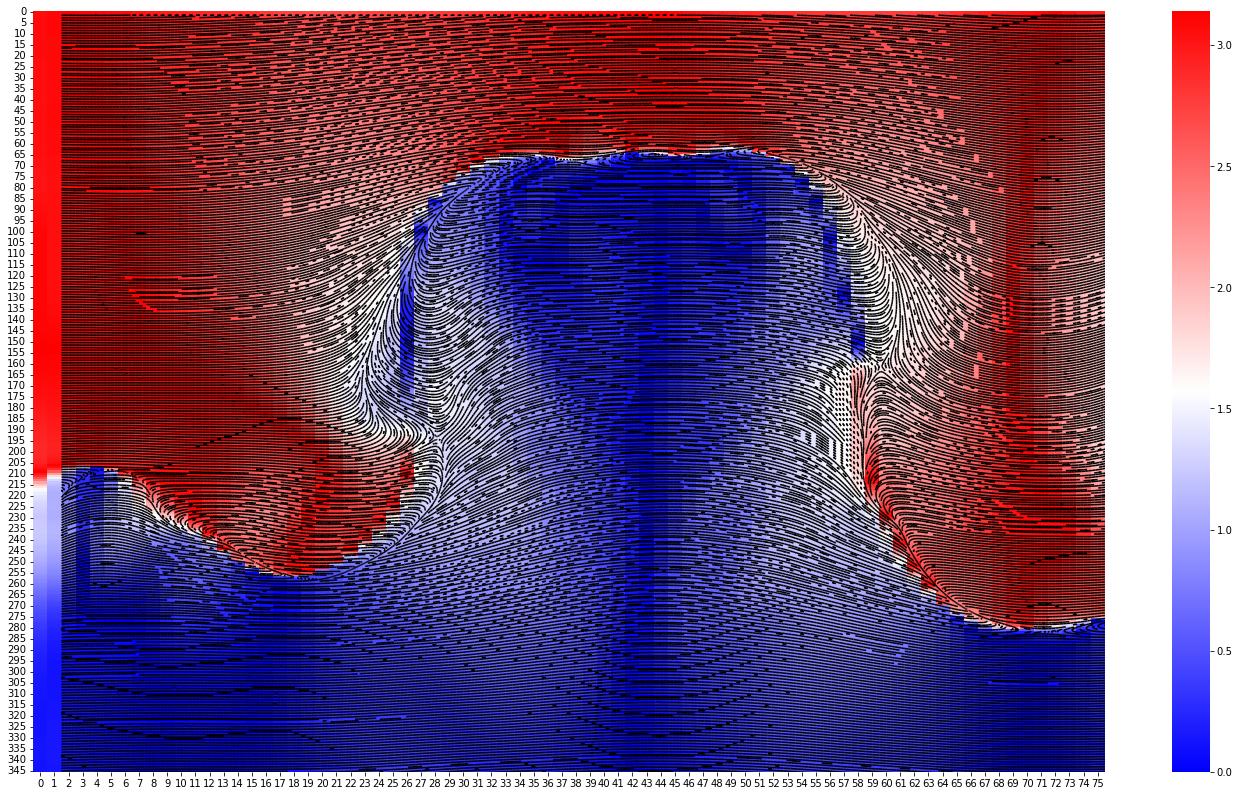

In [3]:

######################
def stream_plt(X, Y, xrange=False, yrange= False, compress=0):
    dataX = X
    dataY = Y
    if xrange:
        # dataX = X[350:700, 304:384]
        # dataY = Y[350:700, 304:384]
        dataX = dataX[:,xrange[0]:xrange[1]]
        dataY = dataY[:,xrange[0]:xrange[1]]
    if yrange:
        dataX = dataX[yrange[0]:yrange[1],:]
        dataY = dataY[yrange[0]:yrange[1],:]
    #計算が重いので平滑化フィルターの畳み込みで圧縮
    if compress:
        carnel1 = mf.ave_carnel(compress)
        carnel2 = carnel1.T
        dataX = mf.convolute(dataX, carnel2,stride=compress)
        dataY = mf.convolute(dataY, carnel1,stride=compress)

    x = range(dataX.shape[1])
    y = range(dataY.shape[0])
    #X,Y方向それぞれのベクトルに対して座標の行列を設定
    X, Y = np.meshgrid(x, y)
    #X,Y方向それぞれのベクトルの強さ
    u = dataX
    v = dataY
    color = u**2 + v**2
    color = color*2/max(color.flat)
    #########rotの計算途中の微分でデータの端っこが削れる
    rot = mf.rot2d(u, v)
    u = u[2:-2,2:-2]
    v = v[2:-2,2:-2]
    X = X[2:-2,2:-2]
    Y = Y[2:-2,2:-2]
    ##########
    rad = np.arccos(u/np.sqrt(u**2+v**2))
    color2 = np.array(v) / np.array(u)
    color2 = color2 - min(color2.flat)
    color2 = color2/max(color2.flat)
    speed = np.sqrt(u**2 + v**2)
    lw = 7*speed / speed.max()

    fig = plt.figure(figsize=[24,14])
    # plt.contour(X,Y,rad)
    #mf.show(rad)#,bar_range=[-0.05,0.05])
    sns.heatmap(rad, cmap="bwr")
    #sns.heatmap(dataY)
    #strm = plt.streamplot(X, Y, u, v, density=[5], color=color, arrowstyle='-', linewidth=1,cmap="rainbow")
    # strm = plt.streamplot(X, Y, u, v, density=[3], color=rot, arrowstyle='-', linewidth=lw,cmap="rainbow")
    strm = plt.streamplot(X, Y, u, v, density=[10], color="black", arrowstyle='-', linewidth=1.5,cmap="bwr", minlength=0.001)

    #strm = plt.streamplot(X, Y, u, v, density=[1,5], color=black, arrowstyle='-|>', linewidth=1)
    
    #fig.colorbar(strm.lines)
    # plt.show()

number =0
xrange = [304,384]
yrange = [350,700]
for job in [5,10,14]:#[1,2,3,4,5,6,7,8,9,10,11,12,13,14]:
    for para in range(1,21,20):
        dataX = mf.load(mf.gen_snap_path("magfieldX",para,job), z=3)
        dataY = mf.load(mf.gen_snap_path("magfieldY",para,job), z=3)
        plt.clf()
        stream =stream_plt(dataX,dataY, xrange=xrange, yrange=yrange)
        plt.savefig(f"{imgout}1018magline/stream.{'{0:02d}'.format(job)}.{'{0:02d}'.format(para)}.png")

        number += 1
        

######################



In [8]:
a = mf.gen_snap_path("magfieldX",1,1)
os.path.basename(a)

'magfieldX.01.01'